## Trabajo Programación

### Gráfico de  la evolución diaria de un ratio COVID19 a fecha de hoy:
**Parámetros:**
 + **Comunidad Autónoma:** para una Comunidad Autónoma dada
 + **Ratio** para uno de los ratios: nº de diagnosticados, hospitalizados, ingresados en UCI y fallecidos

Este programa captura un código de CCAA y un ratio COVID19 y hace una gráfica de la evolución diaria de  los datos
notificados a la Red Nacional de Vigilancia Epidemiológica desde el 1 de enero de 2020 (Datos_Casos_COVID19.csv)

Introduzca codigo ISO (2 caracteres) de la Comunidad Autónoma: an
Introduzca variable: 1 Diagnosticados, 2 Hospitalizados, 3 UCI, 4 Fallecidos 4


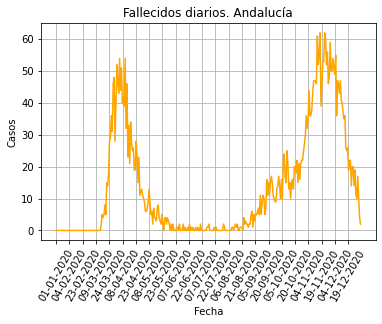

In [1]:
### Función de carga del diccionario de CCAA (codigo, codigo-ISO, Nombre1, Nombre2) desde fichero nfic
def carga_ccaa (nfic, dic):
    dic={}
    fichero = open(nfic, "r",encoding="utf-8-sig")
    linea = fichero.readline().strip() # Leo registro cabecera
    if linea:
        linea = fichero.readline().strip()
        #### Leo primera linea de datos
    while linea:                             ### cada registro (ccaa) un elemento del diccionario
        reg=linea.split(";")
        dic[reg[0]] = reg[2]
        linea = fichero.readline().strip()
    fichero.close()
    return dic

### Función de captura del código ISO de la CCAA  (2 caracteres)
def entra_ccaa():    ### captura codigo ISO CCAA
    lis_ccaa=['CE', 'ML', 'AN', 'AR', 'AS', 'CN', 'CB', 'CL', 'CM', 'CT',
              'PV', 'EX', 'GA', 'IB', 'RI', 'MD', 'MC', 'NC', 'VC']
    ccaa=input('Introduzca codigo ISO (2 caracteres) de la Comunidad Autónoma:')
    ccaa=ccaa.upper()
    while ccaa not in lis_ccaa:
        if  ccaa == '':  ### si no teclea nada finaliza la ejecuión
            break
        else:
            print("código ISO erróneo")
            ccaa=input('Introduzca codigo ISO comunidad autónoma:')
            ccaa='ES-'+ccaa.upper()
    return ccaa

### Función de captura del  ratio a representar
def entra_ratio(): 
    nratio=input('Introduzca variable: 1 Diagnosticados, 2 Hospitalizados, 3 UCI, 4 Fallecidos')
    while nratio not in ('', '1','2','3','4'):
        print ('variable debe valer 1, 2, 3 o 4')
        nratio=input('Introduzca variable: 1 Diagnosticados, 2 Hospitalizados, 3 UCI, 4 Fallecidos, "" Salir')
    if nratio == "1":
        ratio='Casos_Diagnosticados'
    elif nratio =='2':
        ratio='Hospitalizados'
    elif nratio =='3':
        ratio='UCI'
    elif nratio =='4':
        ratio='Fallecidos'
    elif nratio == "":  ### si no teclea nada finaliza la ejecuión
        ratio=''
    return ratio

def carga_casos():      ### Carga fichero de casos por CCAA y día en DataFrame casos
    import pandas as pd
    pd.options.display.max_rows = 10
    casos = pd.read_csv('https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Casos_COVID19.csv',
                   encoding='latin-1',
                   skiprows=6,
#                   nrows=20,
                   sep=';')
    casos['Fecha']= pd.to_datetime(casos['Fecha'], format="%d-%m-%Y") ### Covierte string fecha en datetime
    return casos

### Añade a dataframe df columnas f(formato datetime), mes y fecha AAAA-MM-DD para ordenar
### NO HACE FALTA mejor usar: casos['Fecha']= pd.to_datetime(casos['Fecha'], format="%d-%m-%Y") 
def crea_fechaymes(df):
    import pandas as pd
    from datetime import datetime
    i=0
    lista, listam, listaf=[],[],[]
    for i in df['Fecha']:
        lista.append(datetime.strptime(i,'%d-%m-%Y'))
        listaf.append(i[6:]+'-'+i[3:5]+'-'+i[0:2])
        listam.append(i[3:5])
    df['f']=lista
    df['fecha']=listaf
    df['mes']=listam 
    return df

### Función que elabora el gráfico. Requiere que exista dataframe df. Etiquetas de eje x automaticas
def grafico_CCAA (ccaa, ratio):
    ### Obtiene serie para gráfica
    casosCCAA=df.groupby(['CCAA_ISO','Fecha'],sort=True)[ratio].sum()[ccaa]
    ### Da formato a la gráfica
    plt.title(ratio +" diarios. " + d_ccaa[ccaa[3:]])
    plt.xlabel('Fecha')
    plt.ylabel('Casos')
    plt.rcParams["figure.figsize"] = (10.0, 7.5)
    plt.grid()
    plt.plot(casosCCAA, color='orange')
    plt.savefig('casos'+ccaa[3:]+'1_'+ratio+'.jpg', dpi=400, bbox_inches='tight',
                orientation='landscape' )
    return
### Función que elabora el gráfico.  Requiere que exista dataframe df. Distribuye las etiquetas de eje x cada 15 días 
def grafico_CCAA2 (ccaa, ratio):
    ### Obtiene serie para gráfica
    casosCCAA=df.groupby(['CCAA_ISO','Fecha'],sort=True)[ratio].sum()[ccaa]
#    print(casosCCAA.sum())
    ### Da formato a la gráfica
    ### Etiquetas eje x cada 15 días
    fechas=casosCCAA.index #cogemos la columna de fechas del dataframe
    fechas=fechas.strftime('%d-%m-%Y') 
    lista_fechas=fechas.tolist()[::15] # y nos quedamos con una de cada 15
    plt.xticks(np.arange(len(lista_fechas))*(len(casosCCAA)/len(lista_fechas)), # calculamos cuántas marcas necesitamos y con qué separación
           lista_fechas, # las etiquetas que vamos a colocar 
               rotation=60) # rotadas 90º para que se lean
    plt.title(ratio +" diarios. " + d_ccaa[ccaa[3:]])
    plt.xlabel('Fecha')
    plt.ylabel('Casos')
    plt.rcParams["figure.figsize"] = (10.0, 7.5)
    plt.grid()
    plt.plot(fechas,casosCCAA, color='orange')
    plt.savefig('casos'+ccaa[3:]+'2_'+ratio+'.jpg', dpi=400, bbox_inches='tight',
                orientation='landscape' )
    return

### Programa principal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.display.max_rows = 10

nfic="ccaa.csv"
dic_ccaa={}
l_ccaa=[]
d_ccaa=carga_ccaa (nfic, dic_ccaa)
    
cod_ccaa=entra_ccaa() ### entrada codigo ISO CCAA

if cod_ccaa !='':
    variable=entra_ratio() ### entrada variable del gráfico
if cod_ccaa !='' and variable != '':
    cod_ccaa='ES-'+cod_ccaa

    dfcasos=carga_casos()     ### crea un dataframe con los datos del fichero de casos leido
    df=dfcasos
# Hay que elegir solo una de las funciones o grafico_CCAA o grafico_CCAA2. 
#    grafico_CCAA (cod_ccaa,variable) ### imprime gráfica. plot decide etiquetas eje x
    grafico_CCAA2 (cod_ccaa,variable) ### imprime gráfica con etiquetas cada 15 días
else:   
    print("Gracias")